# Introduction to Jupyter Notebook

2 main types of cells - *Markdown* and `Code`

Press `Shift + Enter` to execute the current cell

### Show documentation

In [1]:
print("hello world")

hello world


In [3]:
print

<function print>

Type the function and press `Shift + Tab` (1 time, 2 times, 4 times shows different level of details of documentation)

In [1]:
#Try placing cursor at the back of print and press Shift + Tab
print   

<function print>

In [2]:
#alternatively could put ? in front of the function and execute this cell
?print

# Exploratory Data Analysis (EDA)

**Purpose**: Get a sensing of the data before performing modeling (e.g. looking for possible patterns)

**Rationale**: If we are not able to observe any patterns in the data, it might not be meaningful to continue with the predictive modeling. Conversely if we are able to see any obvious patterns in the data, it can allow us to confirm our intuition on how the data is supposed to be.

In [3]:
#load the pandas library
import pandas as pd

### Load dataset

In [4]:
#can execute ?function_name to get the documentation page
?pd.read_csv

In [5]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [6]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
#this will give us the column names (take note that Chance of Admit has an extra space at the end)
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Statistical Analysis

Use one or more statistical measures to summarize the data

In [8]:
data['GRE Score'].min()

290

In [9]:
data['GRE Score'].max()

340

#### ❓Q1. What are the commands for getting the mean and standard deviation of the `GRE Score` column?

In [10]:
#TODO: Add in the codes



======================================================================

In [11]:
#Or could just use the describe() function to generate the descriptive statistics (common statistical measures)
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Measurement of association

So far all the above statistical measures are within a single column, it is also possible to find the association between 2 columns. For example, using **correlation** using the `corr()` function

#### ❓Q2. What does the correlation tell us?

In [12]:
#note that there's an extra space at the back
data['GRE Score'].corr(data['Chance of Admit '])

0.81035063546326

In [13]:
#alternatively, we could also generate the correlation matrix
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Data Visualizations

Instead of summarizing the data using one or more statistical measures, we could also use visualizations.

#### ❓Q3. What does the heatmap tell us about the predictors vs the <u>Chance of Admit</u>?

<AxesSubplot:>

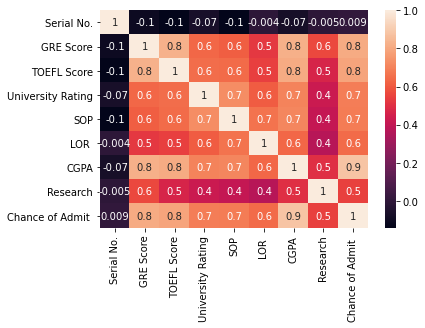

In [14]:
#load Seaborn library
import seaborn as sns
from matplotlib import pyplot as plt

#generate the heatmap of the correlation matrix
sns.heatmap(data.corr(), annot=True, fmt='.1g')

Also possible to customize the color scheme

<AxesSubplot:>

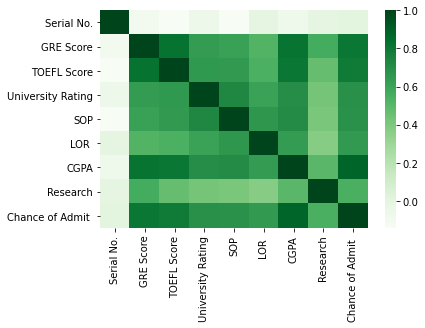

In [15]:
sns.heatmap(data.corr(), cmap="Greens")

<AxesSubplot:>

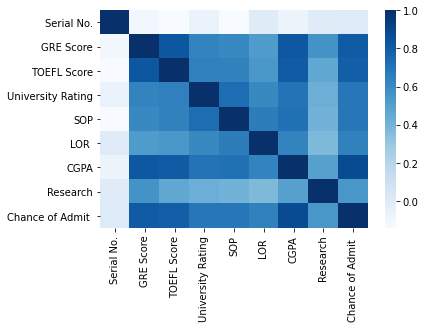

In [16]:
sns.heatmap(data.corr(), cmap="Blues")

Can use histogram to generate the distribution of the data.

<AxesSubplot:>

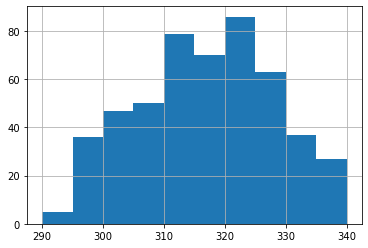

In [17]:
data['GRE Score'].hist()

In [18]:
data_uni_rating5 = data[data['University Rating'] == 5]
data_uni_rating5

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
5,6,330,115,5,4.5,3.0,9.34,1,0.90
22,23,328,116,5,5.0,5.0,9.50,1,0.94
23,24,334,119,5,5.0,4.5,9.70,1,0.95
24,25,336,119,5,4.0,3.5,9.80,1,0.97
25,26,340,120,5,4.5,4.5,9.60,1,0.94
...,...,...,...,...,...,...,...,...,...
470,471,320,110,5,4.0,4.0,9.27,1,0.87
483,484,304,103,5,5.0,3.0,7.92,0,0.71
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96


In [19]:
data_uni_rating1 = data[data['University Rating'] == 1]
data_uni_rating1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
8,9,302,102,1,2.0,1.5,8.00,0,0.50
28,29,295,93,1,2.0,2.0,7.20,0,0.46
37,38,300,105,1,1.0,2.0,7.80,0,0.58
38,39,304,105,1,3.0,1.5,7.50,0,0.52
58,59,300,99,1,3.0,2.0,6.80,1,0.36
79,80,294,93,1,1.5,2.0,7.36,0,0.46
139,140,318,109,1,3.5,3.5,9.12,0,0.78
159,160,297,100,1,1.5,2.0,7.90,0,0.52
160,161,315,103,1,1.5,2.0,7.86,0,0.57
161,162,298,99,1,1.5,3.0,7.46,0,0.53


Can generate the distribution of the data for universities with different rating

#### ❓Q4. What can we say about the GRE score for applicants who are applying for university with rating 5 vs rating 1?

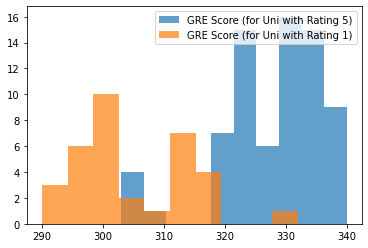

In [20]:
plt.hist(data_uni_rating5['GRE Score'], alpha=0.7, label='GRE Score (for Uni with Rating 5)')
plt.hist(data_uni_rating1['GRE Score'], alpha=0.7, label='GRE Score (for Uni with Rating 1)')
plt.legend(loc='upper right')
plt.show()